<a href="https://colab.research.google.com/github/eliabrodsky/bioml_georgetown/blob/main/Heart_Disease_Data_Analysis_Python__CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
**Key Indicators of Heart Disease (2020 annual CDC survey data of 400k adults related to their health status)**

data:https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Data size: approximately 400 thousand adults in the US, features:

**HeartDisease:** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

**BMI:** Body Mass Index (BMI)

**Smoking:** Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

**AlcoholDrinking:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

**Stroke:** (Ever told) (you had) a stroke?

**PhysicalHealth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)

**MentalHealth:** Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)

**DiffWalking:** Do you have serious difficulty walking or climbing stairs?
**Sex:** Are you male or female?

**AgeCategory:** Fourteen-level age category

## Project Objectives:
this is an unbalanced dataset with a variety of binary, categorical and conitnuous features. We suspect some noise to be present, therefore:

* explore data categories
* convert categorical data to numeric
* run PCA and remove batch effects
* explore various clustering methods

# Import data and preview

In [22]:
!pip install -U kaleido --q

In [23]:
import numpy as np 
#import matplotlib.pyplot as plt 
import pandas as pd 

datalink = 'https://raw.githubusercontent.com/elabrodsky/tulanemba/main/heart_2020_cleaned.csv'

df = pd.read_table(datalink,sep=',',header=(0)) 
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Exploratory Analysis

In [24]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'SleepTime']].T.style.background_gradient(cmap='Reds')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


## Proportions for categorical and binary

In [25]:
print('Heart Disease stats in this data: \n')
print(df['HeartDisease'].value_counts()/df['HeartDisease'].value_counts().sum())
print('\n')
print('Smoking stats in this data: \n')
print(df['Smoking'].value_counts()/df['Smoking'].value_counts().sum())
print('\n')
print('Alcohol Drinking stats in this data: \n')
print(df['AlcoholDrinking'].value_counts()/df['AlcoholDrinking'].value_counts().sum())
print('\n')
print('Stroke stats in this data: \n')
print(df['Stroke'].value_counts()/df['Stroke'].value_counts().sum())
print('\n')
print('Sex stats in this data: \n')
print(df['Sex'].value_counts()/df['Sex'].value_counts().sum())
print('\n')


Heart Disease stats in this data: 

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64


Smoking stats in this data: 

No     0.587523
Yes    0.412477
Name: Smoking, dtype: float64


Alcohol Drinking stats in this data: 

No     0.931903
Yes    0.068097
Name: AlcoholDrinking, dtype: float64


Stroke stats in this data: 

No     0.96226
Yes    0.03774
Name: Stroke, dtype: float64


Sex stats in this data: 

Female    0.524727
Male      0.475273
Name: Sex, dtype: float64




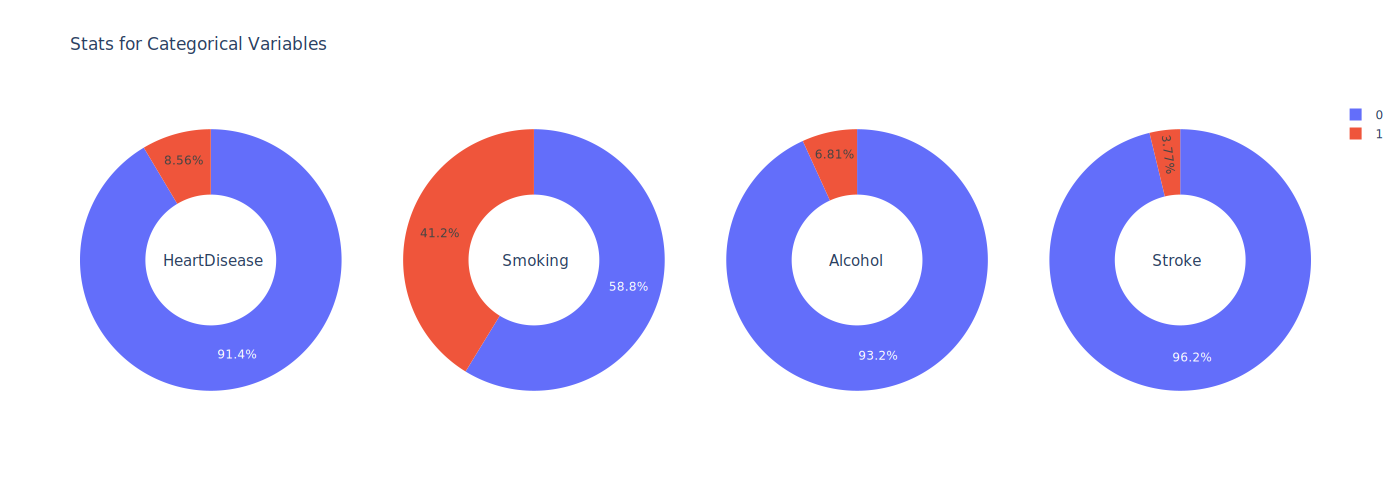

In [26]:
Cat_Num = pd.DataFrame()
Cat_Num['HeartDisease'] = pd.DataFrame(df['HeartDisease'].value_counts()/df['HeartDisease'].value_counts().sum())
Cat_Num['Smoking'] = pd.DataFrame(df['Smoking'].value_counts()/df['Smoking'].value_counts().sum())
Cat_Num['AlcoholDrinking'] = pd.DataFrame(df['AlcoholDrinking'].value_counts()/df['AlcoholDrinking'].value_counts().sum())
Cat_Num['Stroke'] = pd.DataFrame(df['Stroke'].value_counts()/df['Stroke'].value_counts().sum())

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#labels = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "Sex"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, 
                                            {'type':'domain'}, 
                                            {'type':'domain'},
                                            {'type':'domain'}]])
fig.add_trace(go.Pie(values=Cat_Num['HeartDisease'], name="HeartDisease"), 1, 1)
fig.add_trace(go.Pie(values=Cat_Num['Smoking'], name="Smoking"), 1, 2)
fig.add_trace(go.Pie(values=Cat_Num['AlcoholDrinking'], name="AlcoholDrinking"), 1, 3)
fig.add_trace(go.Pie(values=Cat_Num['Stroke'], name="Stroke"), 1, 4)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Stats for Categorical Variables",
    width = 1400,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='HeartDisease', x=0.07, y=0.5, font_size=15, showarrow=False),
                 dict(text='Smoking', x=0.37, y=0.5, font_size=15, showarrow=False),
                 dict(text='Alcohol', x=0.63, y=0.5, font_size=15, showarrow=False),
                 dict(text='Stroke', x=0.91, y=0.5, font_size=15, showarrow=False)])
fig.show('svg')

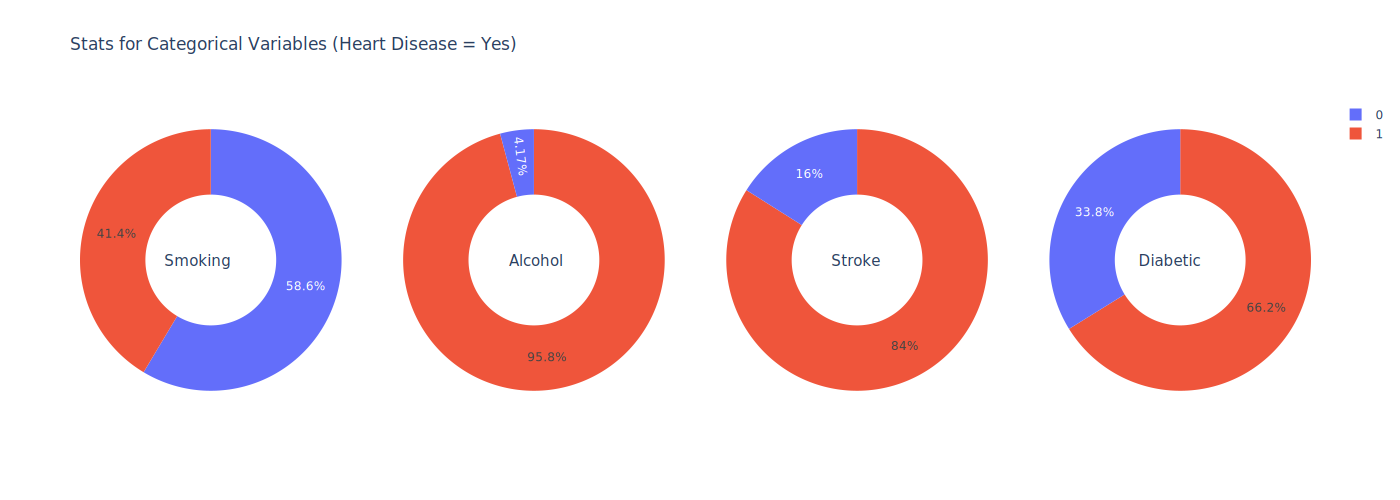

In [27]:
df_HD = df[df['HeartDisease'] == 'Yes']

Cat_Num_HD = pd.DataFrame()
Cat_Num_HD['Smoking'] = pd.DataFrame(df_HD['Smoking'].value_counts()/df_HD['Smoking'].value_counts().sum())
Cat_Num_HD['AlcoholDrinking'] = pd.DataFrame(df_HD['AlcoholDrinking'].value_counts()/df_HD['AlcoholDrinking'].value_counts().sum())
Cat_Num_HD['Stroke'] = pd.DataFrame(df_HD['Stroke'].value_counts()/df_HD['Stroke'].value_counts().sum())
Cat_Num_HD['Diabetic'] = pd.DataFrame(df_HD['Diabetic'].value_counts()/df_HD['Diabetic'].value_counts().sum())

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#labels = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "Sex"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, 
                                            {'type':'domain'}, 
                                            {'type':'domain'},
                                            {'type':'domain'}]])
#fig.add_trace(go.Pie(values=Cat_Num_HD['HeartDisease'], name="HeartDisease"), 1, 1)
fig.add_trace(go.Pie(values=Cat_Num_HD['Smoking'], name="Smoking"), 1, 1)
fig.add_trace(go.Pie(values=Cat_Num_HD['AlcoholDrinking'], name="AlcoholDrinking"), 1, 2)
fig.add_trace(go.Pie(values=Cat_Num_HD['Stroke'], name="Stroke"), 1, 3)
fig.add_trace(go.Pie(values=Cat_Num_HD['Diabetic'], name="Diabetic"), 1, 4)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Stats for Categorical Variables (Heart Disease = Yes)",
    width = 1400,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Smoking', x=0.07, y=0.5, font_size=15, showarrow=False),
                 dict(text='Alcohol', x=0.37, y=0.5, font_size=15, showarrow=False),
                 dict(text='Stroke', x=0.63, y=0.5, font_size=15, showarrow=False),
                 dict(text='Diabetic', x=0.91, y=0.5, font_size=15, showarrow=False)])
fig.show('svg')

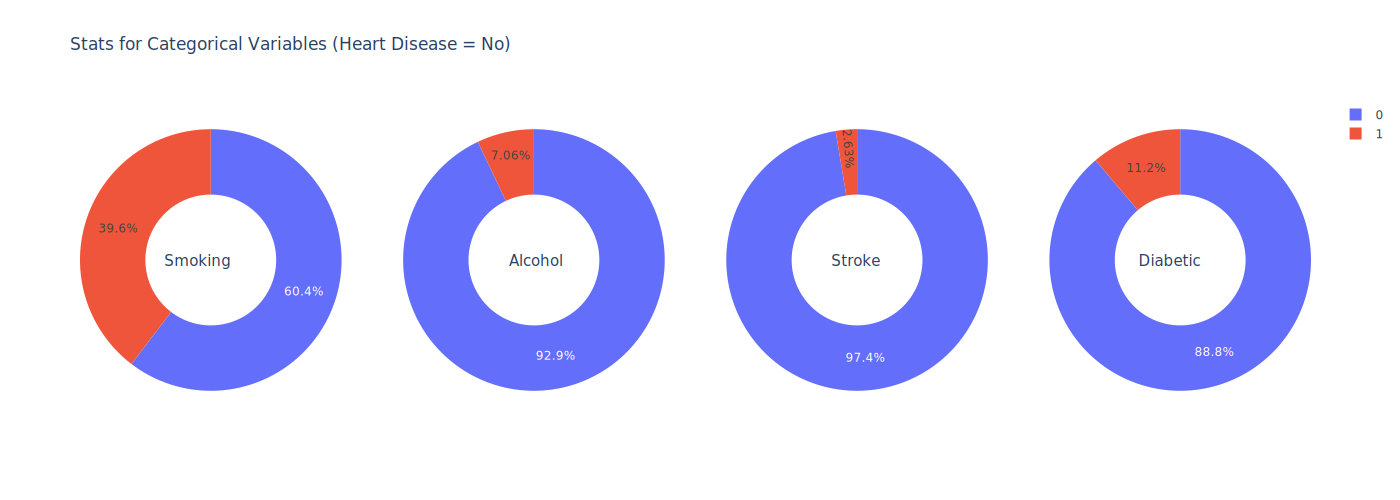

In [28]:
df_NHD = df[df['HeartDisease'] == 'No']

Cat_Num_NHD = pd.DataFrame()
Cat_Num_NHD['Smoking'] = pd.DataFrame(df_NHD['Smoking'].value_counts()/df_NHD['Smoking'].value_counts().sum())
Cat_Num_NHD['AlcoholDrinking'] = pd.DataFrame(df_NHD['AlcoholDrinking'].value_counts()/df_NHD['AlcoholDrinking'].value_counts().sum())
Cat_Num_NHD['Stroke'] = pd.DataFrame(df_NHD['Stroke'].value_counts()/df_NHD['Stroke'].value_counts().sum())
Cat_Num_NHD['Diabetic'] = pd.DataFrame(df_NHD['Diabetic'].value_counts()/df_NHD['Diabetic'].value_counts().sum())

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#labels = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "Sex"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, 
                                            {'type':'domain'}, 
                                            {'type':'domain'},
                                            {'type':'domain'}]])
#fig.add_trace(go.Pie(values=Cat_Num_HD['HeartDisease'], name="HeartDisease"), 1, 1)
fig.add_trace(go.Pie(values=Cat_Num_NHD['Smoking'], name="Smoking"), 1, 1)
fig.add_trace(go.Pie(values=Cat_Num_NHD['AlcoholDrinking'], name="AlcoholDrinking"), 1, 2)
fig.add_trace(go.Pie(values=Cat_Num_NHD['Stroke'], name="Stroke"), 1, 3)
fig.add_trace(go.Pie(values=Cat_Num_NHD['Diabetic'], name="Diabetic"), 1, 4)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Stats for Categorical Variables (Heart Disease = No)",
    width = 1400,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Smoking', x=0.07, y=0.5, font_size=15, showarrow=False),
                 dict(text='Alcohol', x=0.37, y=0.5, font_size=15, showarrow=False),
                 dict(text='Stroke', x=0.63, y=0.5, font_size=15, showarrow=False),
                 dict(text='Diabetic', x=0.91, y=0.5, font_size=15, showarrow=False)])
fig.show('svg')

# Convert to Numeric
Convert string data to numeric for all columns

In [29]:
#convert data to numeric

from sklearn import preprocessing

df_num = df

encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df_num['AgeCategory'] = df_num['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df_num['AgeCategory'] = df_num['AgeCategory'].astype('float')

encode_GenHealth = {'Poor':0, 'Fair':1, 'Good':2,
                      'Very good':3,'Excellent':4}
df_num['GenHealth'] = df_num['GenHealth'].apply(lambda x: encode_GenHealth[x])
df_num['GenHealth'] = df_num['GenHealth'].astype('float')

# Integer encode columns with 2 unique values
for col in ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df_num[col].dtype == 'O':
        le = preprocessing.LabelEncoder()
        df_num[col] = le.fit_transform(df_num[col])

# One-hot encode columns with more than 2 unique values
df_num = pd.get_dummies(df_num, columns=['Race', 'Diabetic'], prefix = ['Race', 'Diabetic'])
df_num.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,No,16.60,1,0,0,3.0,30.0,0,0,57.0,...,0,0,0,0,0,1,0,0,1,0
1,No,20.34,0,0,1,0.0,0.0,0,0,80.0,...,0,0,0,0,0,1,1,0,0,0
2,No,26.58,1,0,0,20.0,30.0,0,1,67.0,...,0,0,0,0,0,1,0,0,1,0
3,No,24.21,0,0,0,0.0,0.0,0,0,77.0,...,0,0,0,0,0,1,1,0,0,0
4,No,23.71,0,0,0,28.0,0.0,1,0,42.0,...,0,0,0,0,0,1,1,0,0,0


In [30]:
#install plotly dash
!pip install dash -q

## Histograms for continuous features

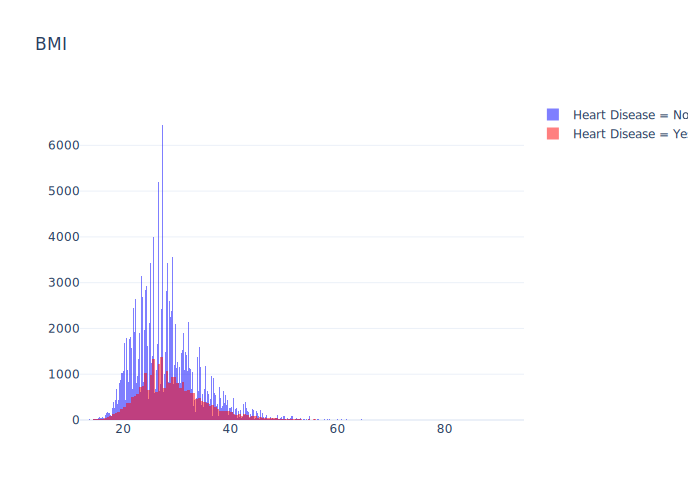

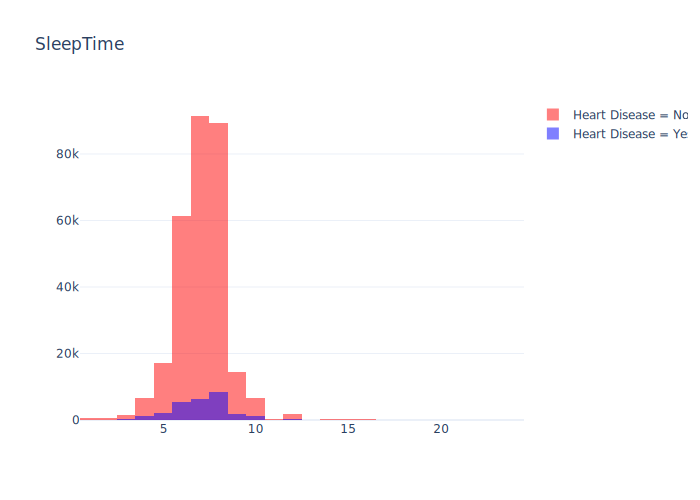

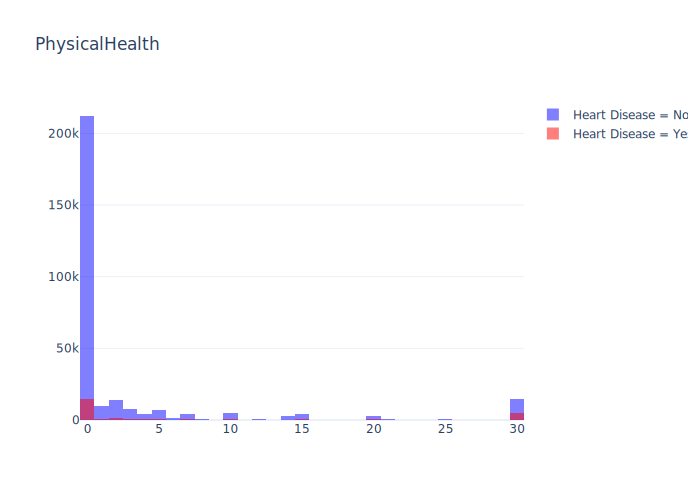

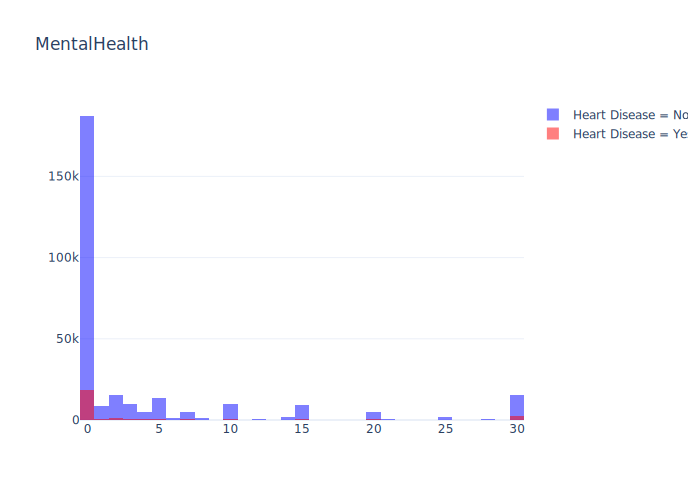

In [31]:
import plotly.graph_objects as go

plotwidth=700

#BMI
figBMI = go.Figure()
figBMI.add_trace(go.Histogram(x=df_num[df_num['HeartDisease']=='No']['BMI'],
              name='Heart Disease = No', marker_color='blue'))
figBMI.add_trace(go.Histogram(x=df_num[df_num['HeartDisease']=='Yes']['BMI'],
              name='Heart Disease = Yes', marker_color='red'))

figBMI.update_layout(barmode='overlay',
                     title_text="BMI",
                     width=plotwidth,
                     template="plotly_white")
figBMI.update_traces(opacity=0.5)

#SleepTime
figSleep = go.Figure()
figSleep.add_trace(go.Histogram(x=df_num[df_num['HeartDisease']=='No']['SleepTime'],
              name='Heart Disease = No', marker_color='red'))
figSleep.add_trace(go.Histogram(x=df_num[df_num['HeartDisease']=='Yes']['SleepTime'],
              name='Heart Disease = Yes', marker_color='blue'))


figSleep.update_layout(barmode='overlay',
                       title_text="SleepTime",
                       width=plotwidth,
                       template="plotly_white")
figSleep.update_traces(opacity=0.5)

#PhysicalHealth
figPH = go.Figure()
figPH.add_trace(go.Histogram(x=df_num[df_num['HeartDisease']=='No']['PhysicalHealth'],
              name='Heart Disease = No', marker_color='blue'))
figPH.add_trace(go.Histogram(x=df_num[df_num['HeartDisease']=='Yes']['PhysicalHealth'],
              name='Heart Disease = Yes', marker_color='red'))


figPH.update_layout(barmode='overlay',
                    title_text="PhysicalHealth",
                    width=plotwidth,
                    template="plotly_white")
figPH.update_traces(opacity=0.5)

#MentalHealth
figMH = go.Figure()
figMH.add_trace(go.Histogram(x=df_num[df_num['HeartDisease']=='No']['MentalHealth'],
              name='Heart Disease = No', marker_color='blue'))
figMH.add_trace(go.Histogram(x=df_num[df_num['HeartDisease']=='Yes']['MentalHealth'],
              name='Heart Disease = Yes', marker_color='red'))

figMH.update_layout(barmode='overlay',
                    title_text="MentalHealth",
                    width=plotwidth,
                    template="plotly_white")
figMH.update_traces(opacity=0.5)

figBMI.show('svg')
figSleep.show('svg')
figPH.show('svg')
figMH.show('svg')

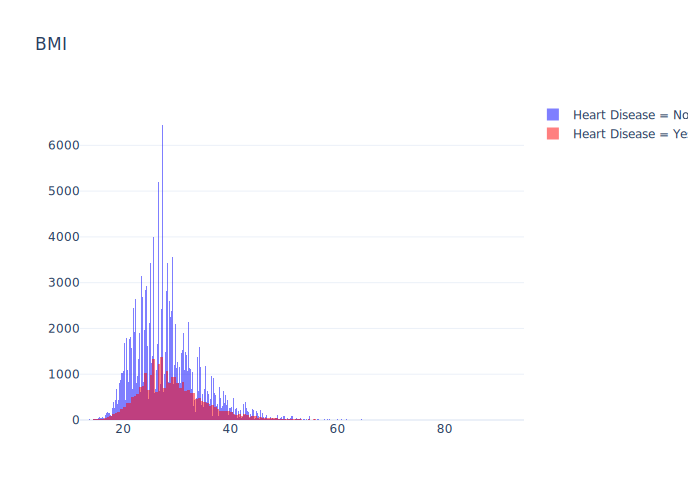

In [32]:
#BMI
figBMI = go.Figure()
figBMI.add_trace(go.Histogram(x=df_num[df_num['HeartDisease']=='No']['BMI'],
              name='Heart Disease = No', marker_color='blue'))
figBMI.add_trace(go.Histogram(x=df_num[df_num['HeartDisease']=='Yes']['BMI'],
              name='Heart Disease = Yes', marker_color='red'))

figBMI.update_layout(barmode='overlay',
                     title_text="BMI",
                     width=plotwidth,
                     template="plotly_white")
figBMI.update_traces(opacity=0.5)

figBMI.show('svg')

In [33]:
import statistics
x = df_num[df_num['HeartDisease']=='No']['BMI']
np.mean(x)

28.224658336240093

In [34]:
df_num1 = df_num
df_num1['HeartDisease'] = df_num1['HeartDisease'].map(dict(Yes=1, No=0))

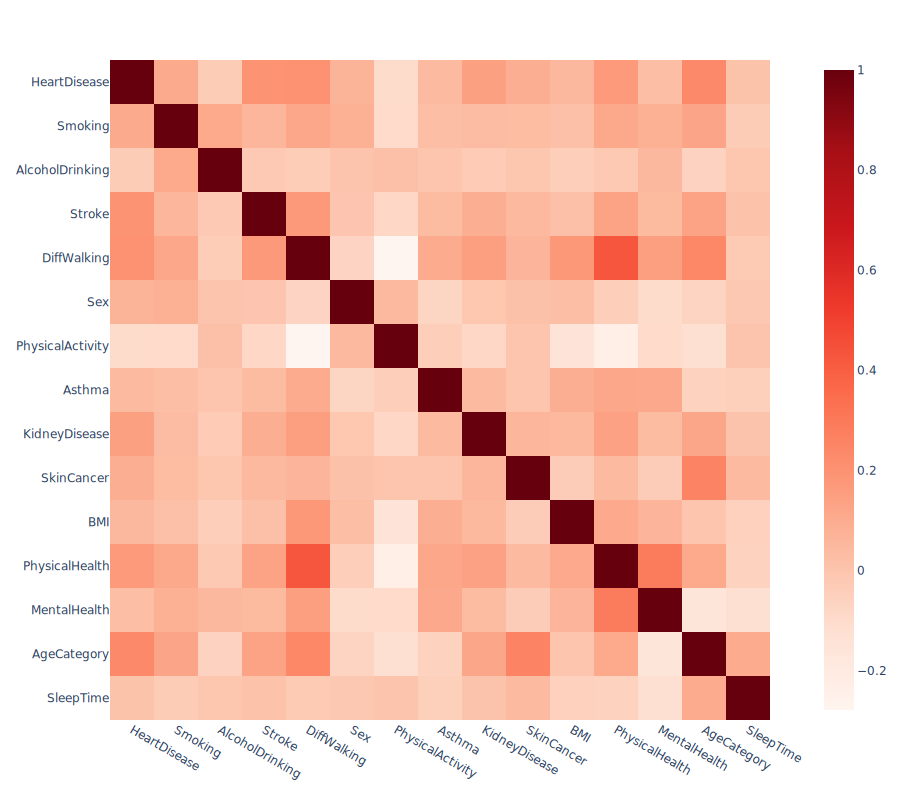

In [35]:
import plotly.express as px

fig = px.imshow(df_num1[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']].corr(),color_continuous_scale="Reds")
fig.update_layout(height=800, width=900)
fig.show('svg')

#PCA
Perform PCA for visual exploration of all data

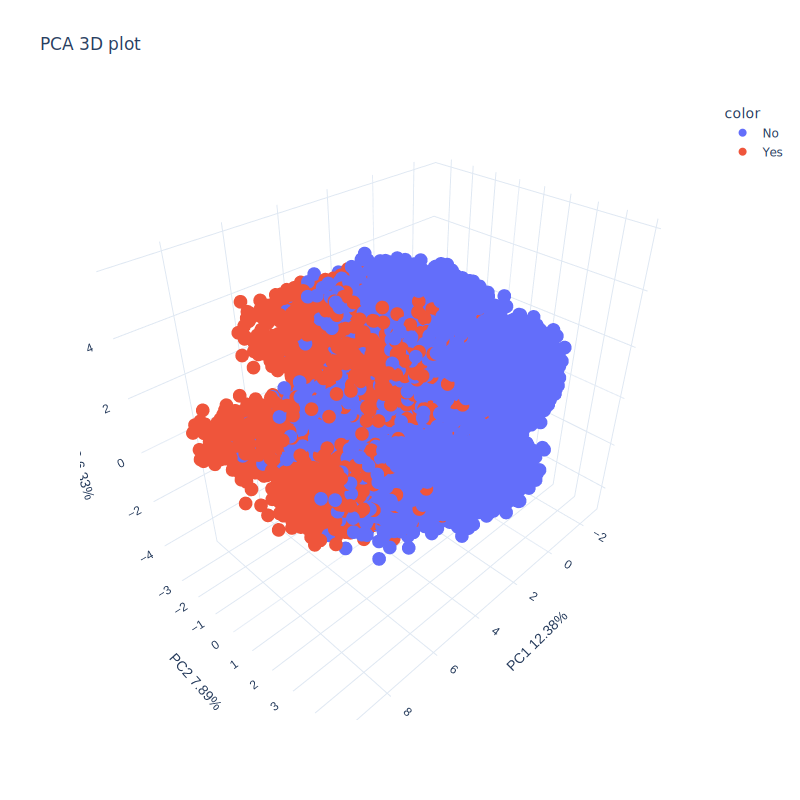

In [36]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

scaled = StandardScaler() 
scaled.fit(df_num1) 
scaled_data = scaled.transform(df_num1) 

#Run Principal Component Analysis
pca = PCA(n_components=3) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

PC1_label = "PC1 {}%".format(round((100*pca.explained_variance_ratio_[0]),2))
PC2_label = "PC2 {}%".format(round((100*pca.explained_variance_ratio_[1]),2)) 
PC3_label = "PC3 {}%".format(round((100*pca.explained_variance_ratio_[2]),2))

#create dataframe for PCA
df_pca = pd.DataFrame(xpca)
df_pca.columns = [PC1_label,PC2_label,PC3_label]

#visualize
figPCA = px.scatter_3d(df_pca, x=PC1_label, y=PC2_label, z=PC3_label, 
                       title="PCA 3D plot", color=df.HeartDisease, 
                       template="plotly_white", height=800, width=800)
figPCA.show('svg')

## Cleaning up PCA
Since we can see distinct clusters in the PCA, we will remove features creating such batches. In this case through elimination, the feature introducing such batches as when 'Race_white'

(elimination was performed with binary features such as 'Sex', 'Asthma', 'Smoking', etc.)

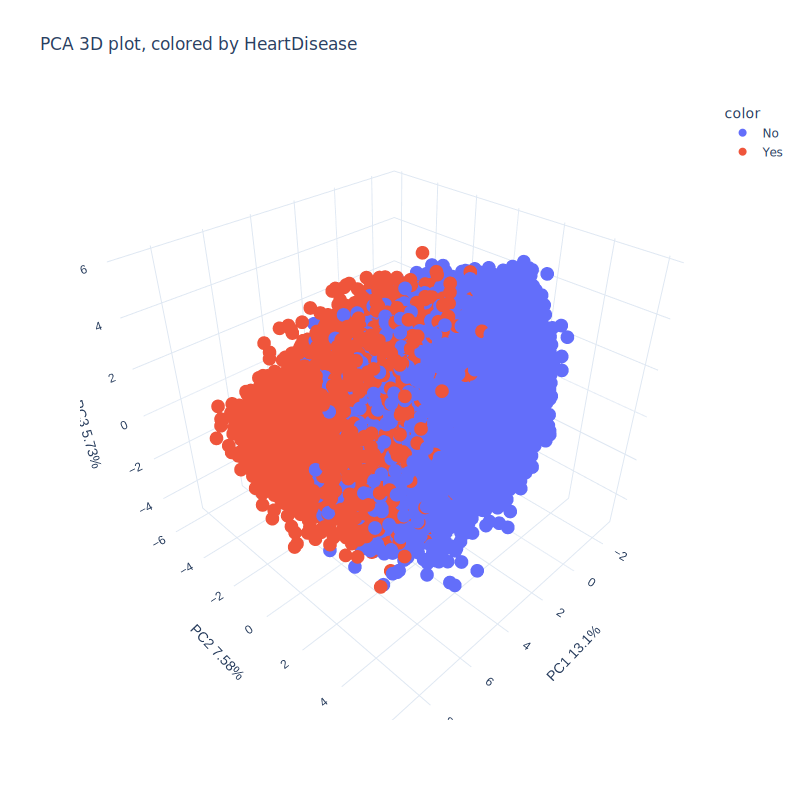

In [37]:
df_numX = df_num1.iloc[:,0:22]
del df_numX['Race_White']

scaled = StandardScaler() 
scaled.fit(df_numX) 
scaled_data = scaled.transform(df_numX) 

#Run Principal Component Analysis
pca = PCA(n_components=3) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

PC1_label = "PC1 {}%".format(round((100*pca.explained_variance_ratio_[0]),2))
PC2_label = "PC2 {}%".format(round((100*pca.explained_variance_ratio_[1]),2)) 
PC3_label = "PC3 {}%".format(round((100*pca.explained_variance_ratio_[2]),2))

#create dataframe for PCA
df_pca = pd.DataFrame(xpca)
df_pca.columns = [PC1_label,PC2_label,PC3_label]

#visualize
figPCA = px.scatter_3d(df_pca, x=PC1_label, y=PC2_label, z=PC3_label, 
                       title="PCA 3D plot, colored by HeartDisease", color=df.HeartDisease, 
                       template="plotly_white", height=800,width=800)
figPCA.show('svg')

#Clustering
Clustering - what number of clusters is optimal for the dataset.

approaches: inertia (Within-clusters Sum of Squared errors) and silhouette (The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation))  average score

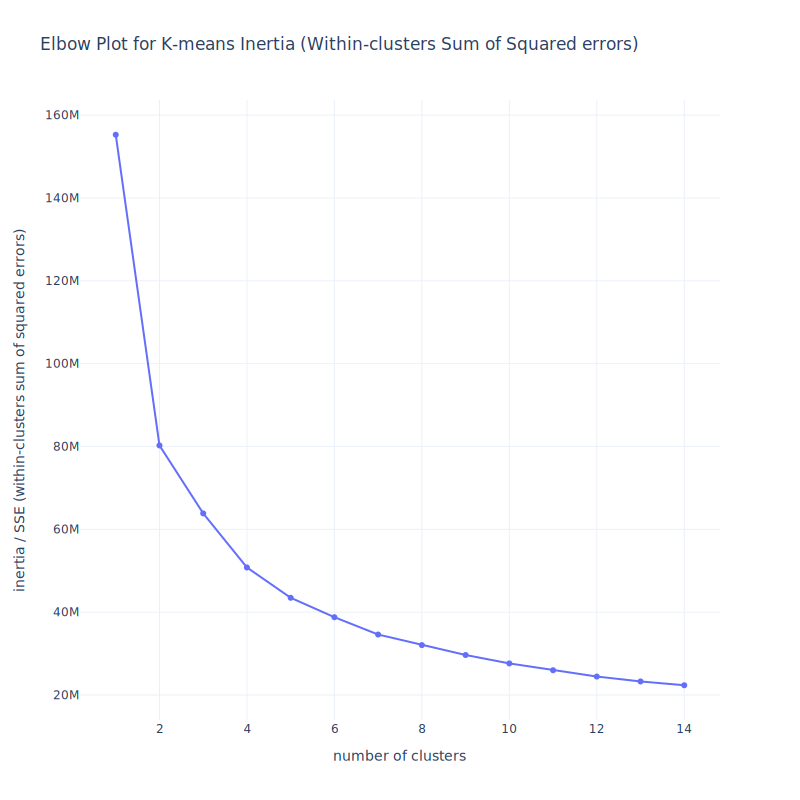

In [38]:
# import SciKit clustering methods: K-means
from sklearn.cluster import KMeans

#create a dataframe for k-means inertia
inertia = pd.DataFrame()

#record inertia for k=1-10 using k-means clustering
for i in range (1,15):
  kmeans_m = KMeans(n_clusters=i).fit(df_numX)
  inertia = inertia.append({'clust':i,'inertia': kmeans_m.inertia_}, 
                            ignore_index=True)

#plot k-means inertia elbow plot
figInertia = px.line(inertia, x="clust", y="inertia",
                     title="Elbow Plot for K-means Inertia (Within-clusters Sum of Squared errors)", 
                     template="plotly_white", 
                     height=800, width=800, markers=True)
figInertia.update_layout(
    xaxis_title="number of clusters",
    yaxis_title="inertia / SSE (within-clusters sum of squared errors)",
)

figInertia.show('svg')

Now we can run the clustering using 6 clusters based on the inertia method

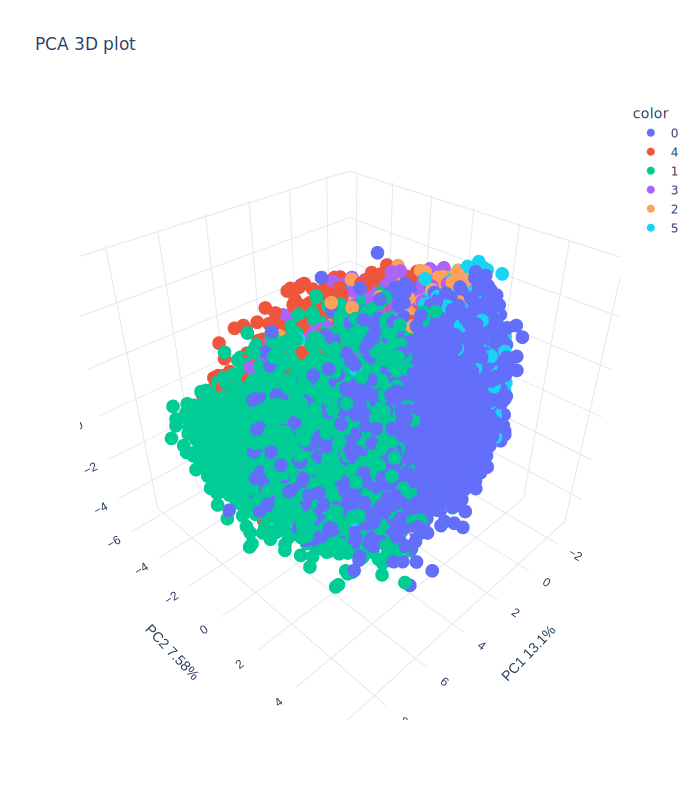

In [39]:
#run k-means with n clusters
kmeans_m = KMeans(n_clusters=6).fit(df_numX)

kmeans_m.labels_ = kmeans_m.labels_.astype(str)

#visualize output using PCA
figPCA = px.scatter_3d(df_pca, x=PC1_label, y=PC2_label, z=PC3_label, 
                       title="PCA 3D plot", color=kmeans_m.labels_, 
                       template="plotly_white", height=800)
figPCA.show('svg')

Now we can plot the number of items per cluster

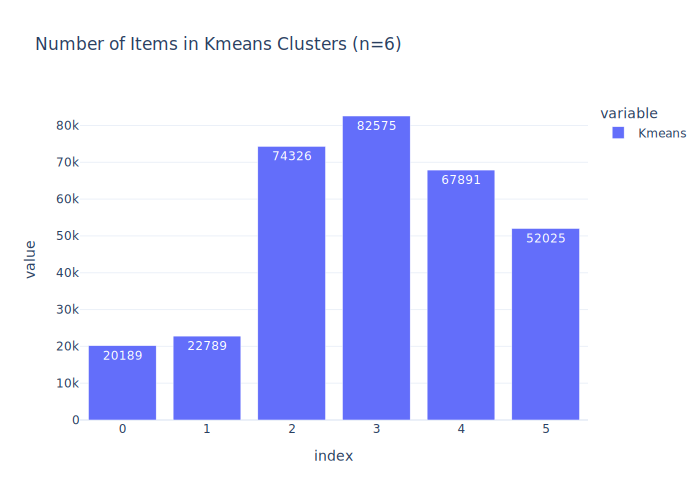

In [40]:
import itertools

df_num1['Kmeans'] = kmeans_m.labels_
cluster_num = df_num1.groupby('Kmeans')["Kmeans"].count()

#visualize number of items in each cluster
figKmeans = px.bar(cluster_num, 
                title="Number of Items in Kmeans Clusters (n=6)", 
                text=cluster_num,
                template="plotly_white")
figKmeans.show('svg')

In [43]:
#define a function to draw summary plots for each Kmeans cluster
def cluster_report(cluster):
    
    new_df = df_num1[df_num1['Kmeans'] == cluster]

    Cat_Num1 = pd.DataFrame()
    Cat_Num1['HeartDisease'] = pd.DataFrame(new_df['HeartDisease'].value_counts()/new_df['HeartDisease'].value_counts().sum())
    Cat_Num1['Smoking'] = pd.DataFrame(new_df['Smoking'].value_counts()/new_df['Smoking'].value_counts().sum())
    Cat_Num1['AlcoholDrinking'] = pd.DataFrame(new_df['AlcoholDrinking'].value_counts()/new_df['AlcoholDrinking'].value_counts().sum())
    Cat_Num1['Stroke'] = pd.DataFrame(new_df['Stroke'].value_counts()/new_df['Stroke'].value_counts().sum())

    fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, 
                                              {'type':'domain'}, 
                                              {'type':'domain'},
                                              {'type':'domain'}]])
    fig.add_trace(go.Pie(values=Cat_Num1['HeartDisease'], name="HeartDisease"), 1, 1)
    fig.add_trace(go.Pie(values=Cat_Num1['Smoking'], name="Smoking"), 1, 2)
    fig.add_trace(go.Pie(values=Cat_Num1['AlcoholDrinking'], name="AlcoholDrinking"), 1, 3)
    fig.add_trace(go.Pie(values=Cat_Num1['Stroke'], name="Stroke"), 1, 4)

    # Use `hole` to create a donut-like pie chart
    fig.update_traces(hole=.5, hoverinfo="label+percent+name")
    title_cluster = "Stats for Categorical Variables in cluster " + str(i)

    fig.update_layout(
        title_text=title_cluster,
        width=1400,

       # Add annotations in the center of the donut pies.
       annotations=[dict(text='HeartDisease', x=0.07, y=0.5, font_size=15, showarrow=False),
                     dict(text='Smoking', x=0.37, y=0.5, font_size=15, showarrow=False),
                     dict(text='Alcohol', x=0.63, y=0.5, font_size=15, showarrow=False),
                     dict(text='Stroke', x=0.91, y=0.5, font_size=15, showarrow=False)])
    fig.show('svg')  

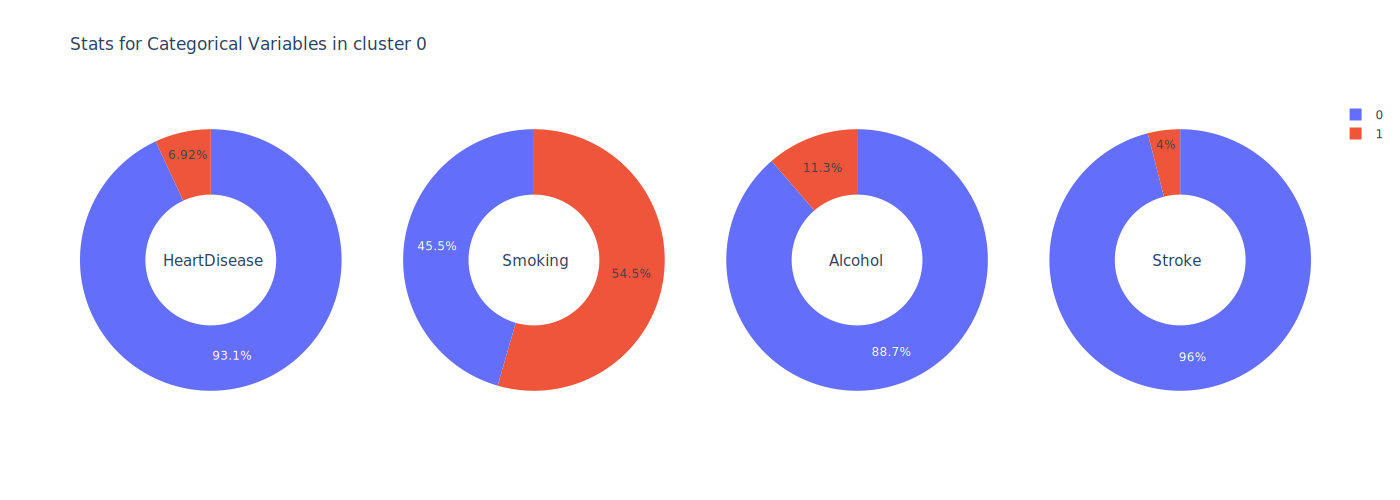

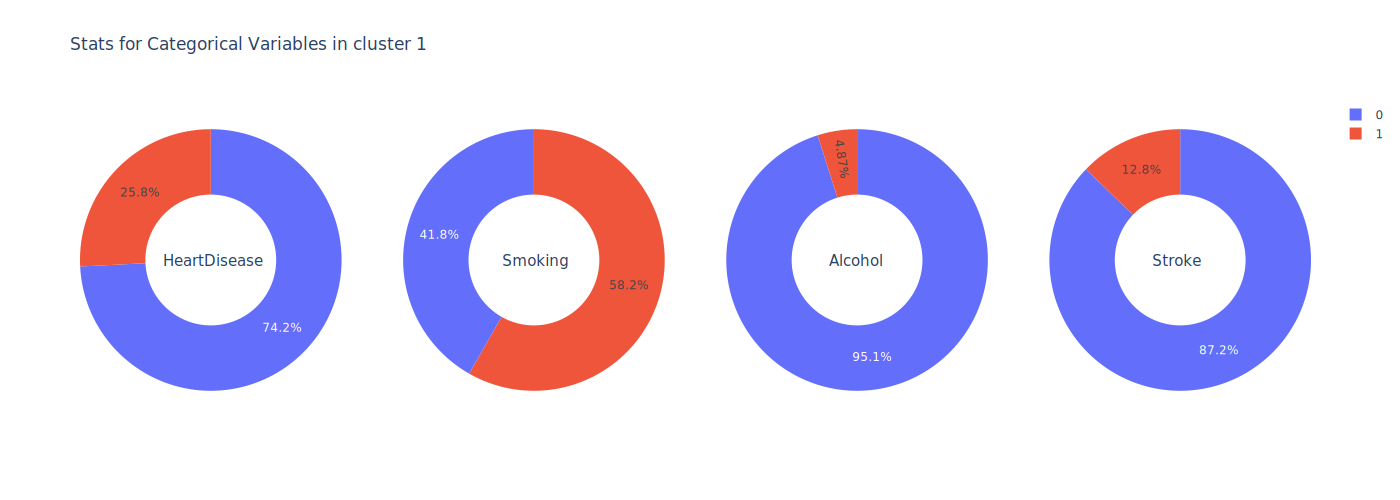

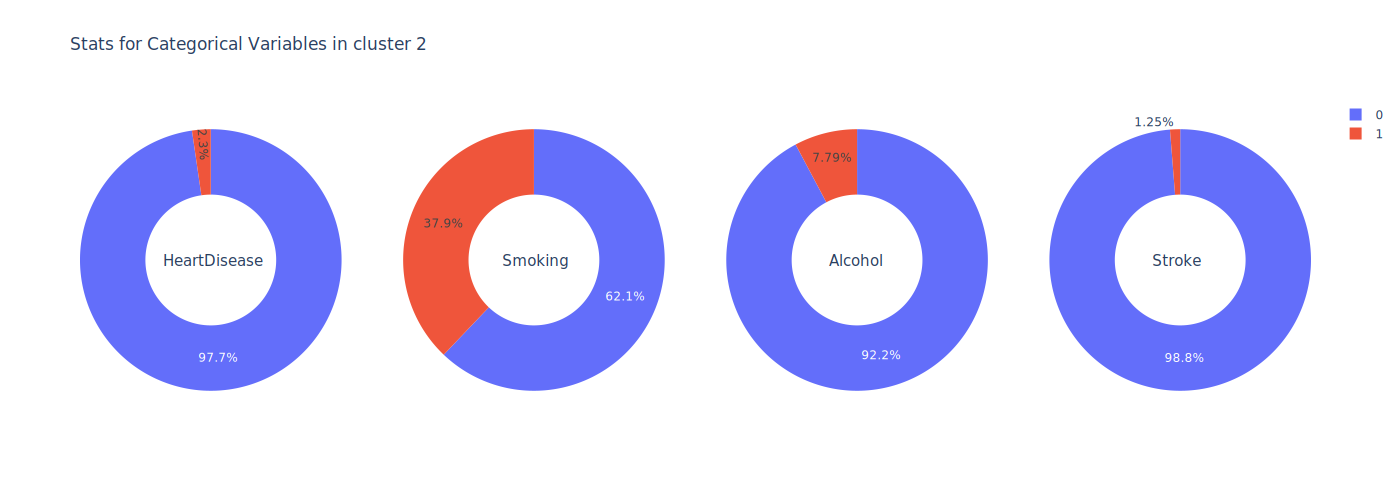

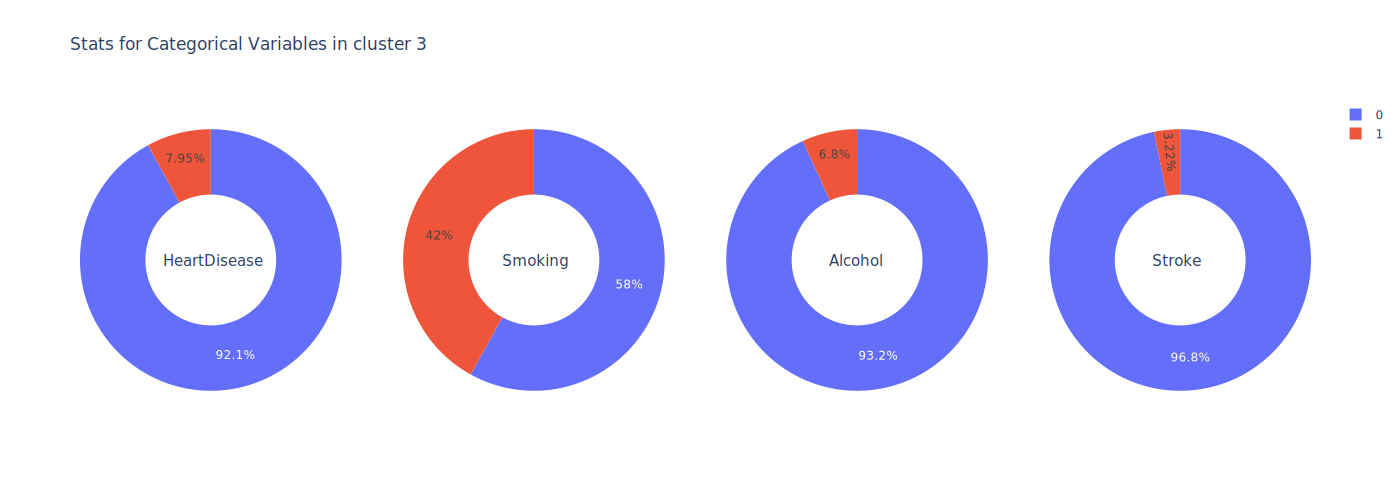

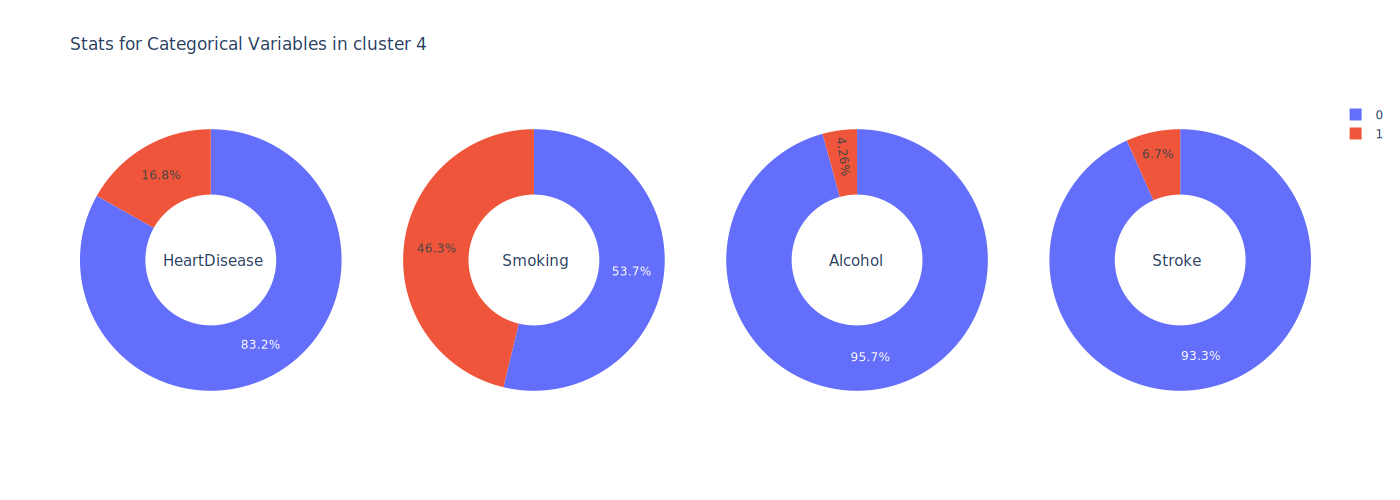

In [44]:
#make categorical summaries for all clusters
for i in range(0,5):
    cluster_report(str(i))

##DBSCAN
we can also use another method for clustering, called DBSCAN
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

First, we estimate the epsilon value for DBSCAN
https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

In layman’s terms, we find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon.

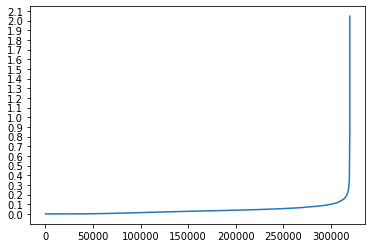

In [45]:
#first, we need to identify the best epsioln for DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.yticks(np.arange(min(distances), max(distances)+1, 0.1))
plt.plot(distances);

based on this analysis, we can determine the range of 0.1 to 0.5 for epsilon, let's test how long each setting will take and what is the resulting number of clusters for each case:

In [46]:
import timeit
from sklearn.cluster import DBSCAN

r = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

df_numDBSCAN = df_numX

for i in r:
  title = str('DBSCAN'+ str(i))
  start = timeit.default_timer()
  dbscan_m = DBSCAN(eps=i, min_samples=50).fit(scaled_data)
  df_numDBSCAN[title] = dbscan_m.labels_
  cluster_num = len(set(dbscan_m.labels_))
  end = timeit.default_timer()
  exec_t = end-start
  print('for DBSCAN epsilon=%s, total number of DBSCAN clusters is %d' % (i, cluster_num))
  print('execution time is ', exec_t)

for DBSCAN epsilon=0.1, total number of DBSCAN clusters is 63
execution time is  1339.7583585289995
for DBSCAN epsilon=0.2, total number of DBSCAN clusters is 130
execution time is  1275.0698516379998



KeyboardInterrupt



for DBSCAN epsilon=0.1, total number of DBSCAN clusters is 63
execution time is  1044.118032323

for DBSCAN epsilon=0.2, total number of DBSCAN clusters is 130
execution time is  1009.9149908759991

for DBSCAN epsilon=0.3, total number of DBSCAN clusters is 60
execution time is  958.0493138559996

for DBSCAN epsilon=0.4, total number of DBSCAN clusters is 95
execution time is  994.883355005999

for DBSCAN epsilon=0.5, total number of DBSCAN clusters is 142
execution time is  972.5658434010002

for DBSCAN epsilon=0.6, total number of DBSCAN clusters is 202
execution time is  812.671757864

for DBSCAN epsilon=0.7, total number of DBSCAN clusters is 101
execution time is  807.9882650769996

for DBSCAN epsilon=0.8, total number of DBSCAN clusters is 135
execution time is  821.0735696289994

for DBSCAN epsilon=0.9, total number of DBSCAN clusters is 165
execution time is  818.1107036229987

In [47]:
df_numDBSCAN.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,DBSCAN0.1,DBSCAN0.2
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,...,1,0,1,0,0,0,0,0,-1,-1
1,0,20.34,0,0,1,0.0,0.0,0,0,80.0,...,0,0,0,0,0,0,0,0,-1,-1
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,...,1,0,0,0,0,0,0,0,-1,-1
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,...,0,0,1,0,0,0,0,0,-1,-1
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,...,0,0,0,0,0,0,0,0,-1,-1


DBSCAN0.1
for DBSCAN epsilon=0.1, total number of DBSCAN clusters is 63


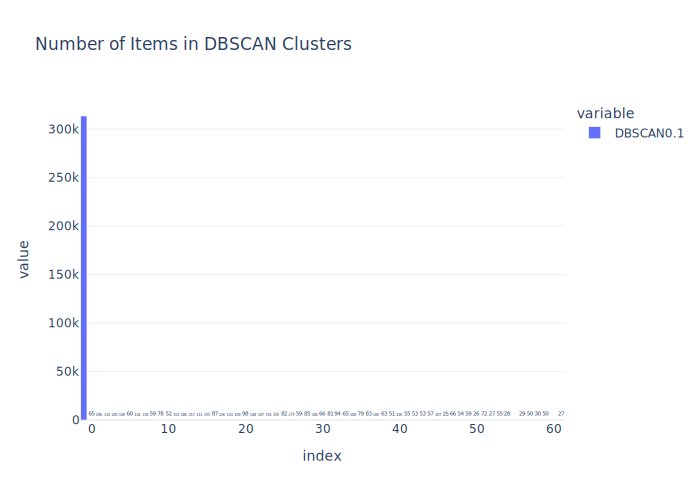

DBSCAN0.2
for DBSCAN epsilon=0.2, total number of DBSCAN clusters is 130


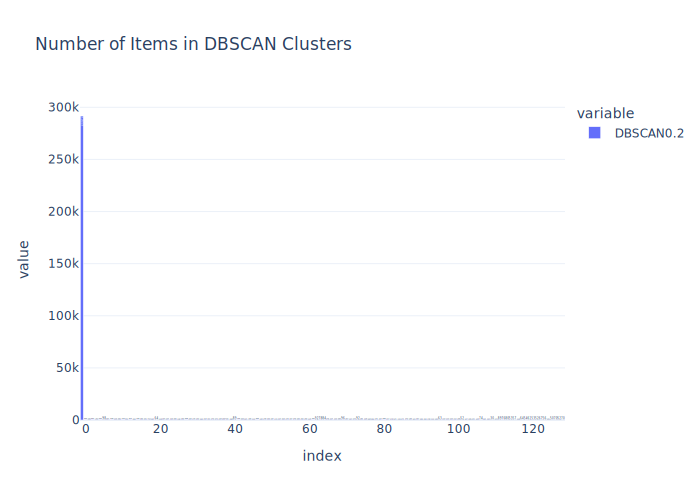

DBSCAN0.3


KeyError: ignored

In [48]:
#run cluster summary for each epsilon

r = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in r:
  title = str('DBSCAN'+ str(i))
  print(title)
  cluster_num1 = df_numDBSCAN.groupby(title)[title].count()
  cluster_num = len(set(df_numDBSCAN[title]))
  print('for DBSCAN epsilon=%s, total number of DBSCAN clusters is %d' % (i, cluster_num))
  #visualize number of items in each cluster
  fig = px.bar(cluster_num1, 
                title="Number of Items in DBSCAN Clusters", 
                text=cluster_num1,
                template="plotly_white")
  fig.show('svg')

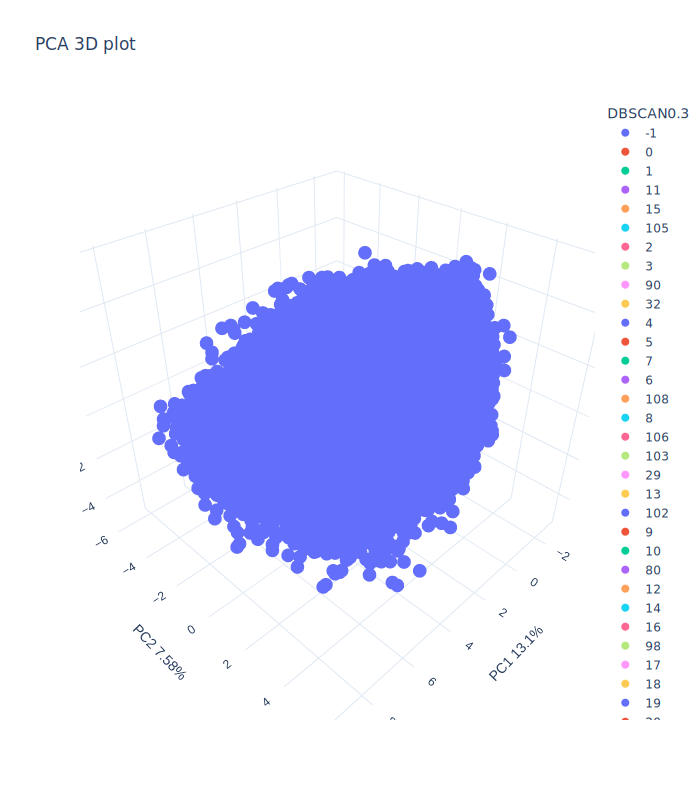

In [49]:
dbscan_m.labels_ = dbscan_m.labels_.astype(str)

df_pca[title] = dbscan_m.labels_

#visualize output using PCA
figPCA = px.scatter_3d(df_pca, x=PC1_label, y=PC2_label, z=PC3_label, 
                       title="PCA 3D plot", color=title, 
                       template="plotly_white", height=800)
figPCA.show('svg')

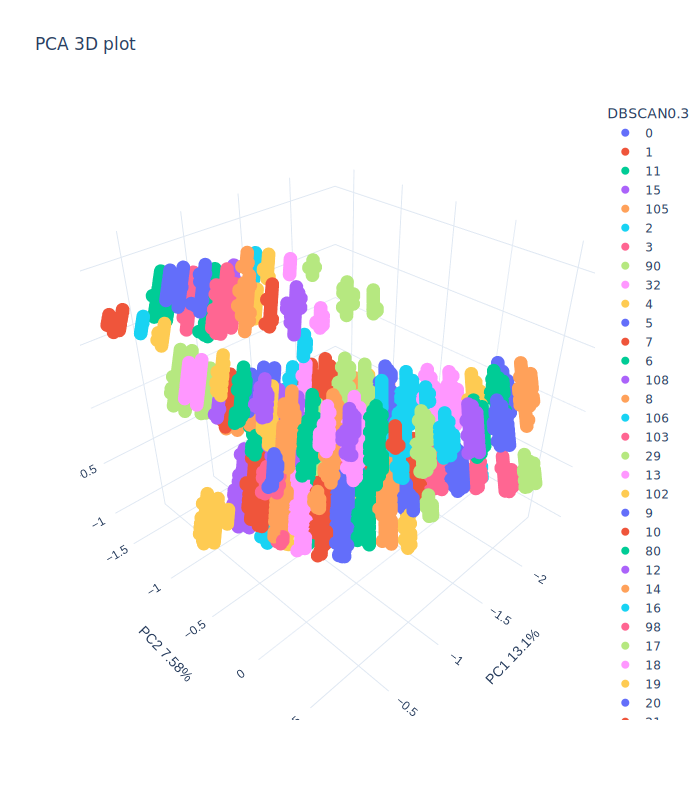

In [50]:
df_pca_DBScan1 = df_pca[df_pca[title] != '-1']

#visualize output using PCA
figPCA = px.scatter_3d(df_pca_DBScan1, x=PC1_label, y=PC2_label, z=PC3_label, 
                       title="PCA 3D plot", color=title, 
                       template="plotly_white", height=800)
figPCA.show('svg')

In [52]:
df_pca_DBScan1 = df_pca[df_pca['DBSCAN0.3'] != '-1']
df_pca_DBScan1.head()

,PC1 13.1%,PC2 7.58%,PC3 5.73%,DBSCAN0.3
28,-1.136788,-0.309708,-0.705679,0
41,-1.582505,-0.872892,-0.294367,1
61,-1.424583,-1.401886,-0.841826,11
67,-1.269557,-1.103262,-0.168806,15
68,-1.016476,-1.244171,-0.138075,105


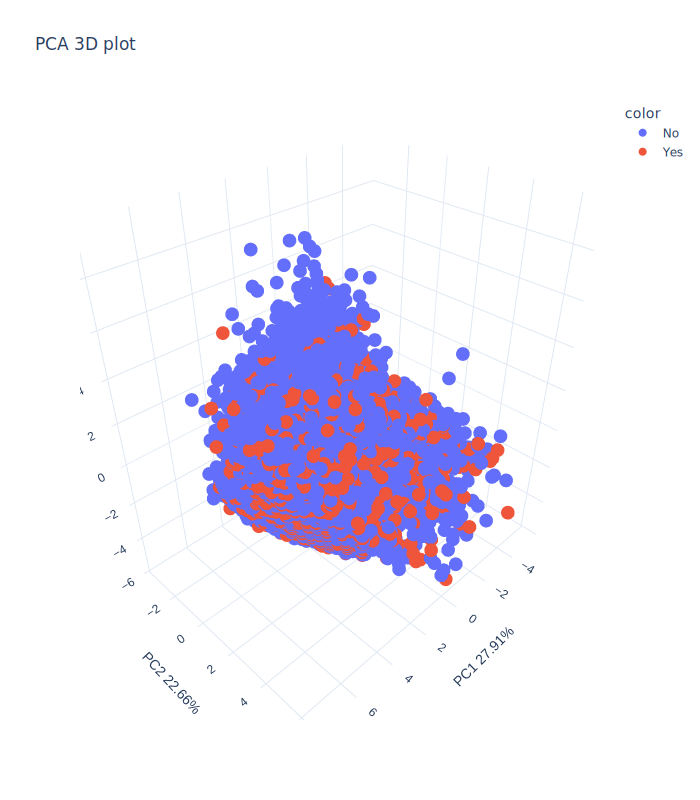

In [53]:
#rerun 
df_num2 = df_num1[[ 'BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']]

scaled = StandardScaler() 
scaled.fit(df_num2) 
scaled_data = scaled.transform(df_num2) 

#Run Principal Component Analysis
pca = PCA(n_components=3) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

PC1_label = "PC1 {}%".format(round((100*pca.explained_variance_ratio_[0]),2))
PC2_label = "PC2 {}%".format(round((100*pca.explained_variance_ratio_[1]),2)) 
PC3_label = "PC3 {}%".format(round((100*pca.explained_variance_ratio_[2]),2))

#create dataframe for PCA
df_pca = pd.DataFrame(xpca)
df_pca.columns = [PC1_label,PC2_label,PC3_label]

#visualize
figPCA = px.scatter_3d(df_pca, x=PC1_label, y=PC2_label, z=PC3_label, 
                       title="PCA 3D plot", color=df.HeartDisease, 
                       template="plotly_white", height=800)
figPCA.show('svg')